In [34]:
from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
drive.mount('/content/gdrive')
!ls
%cd gdrive/My\ Drive/colorectal_rgb_64/
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
color_eval_augment._rgb.ipynb		 displayGeneratedImage_64643.ipynb
color_eval_origin_64641_ImageGene.ipynb  gan_training
color_eval_origin_64643.ipynb		 hmnist_64_64_RGB.csv
color_eval_origin_64643.ipynb（副本）	 images
cwgan-gp-color_rgb.ipynb
[Errno 2] No such file or directory: 'gdrive/My Drive/colorectal_rgb_64/'
/content/gdrive/My Drive/colorectal_rgb_64
color_eval_augment._rgb.ipynb		 displayGeneratedImage_64643.ipynb
color_eval_origin_64641_ImageGene.ipynb  gan_training
color_eval_origin_64643.ipynb		 hmnist_64_64_RGB.csv
color_eval_origin_64643.ipynb（副本）	 images
cwgan-gp-color_rgb.ipynb


In [35]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [36]:
# importing the libraries

import numpy as np 
import pandas as pd 

# from tensorflow import keras
# # from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
# # from keras.models import Sequential
# # from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix

In [37]:
#data = pd.read_csv("../input/hmnist_64_64_L.csv")      # reading the data
data = pd.read_csv("./hmnist_64_64_RGB.csv")      # reading the data
# data_hmn = pd.read_csv("./hmnist_64_64_RGB.csv") 
data_hmn = data

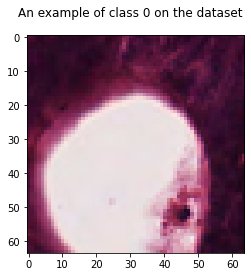

In [38]:
img_size= 64
channel = 3

data_0 = data_hmn[(data_hmn["label"] == 1)]
data_0.drop(["label"],axis=1, inplace=True)
data_t0 = data_0
img_0 = data_t0.iloc[0].to_numpy()  #leon, new
img_0 = img_0.reshape(img_size,img_size,channel)
plt.imshow(img_0)
plt.suptitle("An example of class 0 on the dataset")
plt.show()

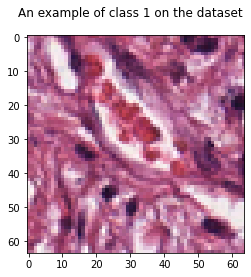

In [39]:
data_1 = data_hmn[(data_hmn["label"] == 2)]
data_1.drop(["label"],axis=1, inplace=True)
data_t1 = data_1
# data_0.head()

img_1 = data_t1.iloc[0].to_numpy()  #leon, new
img_1 = img_1.reshape(img_size,img_size,channel)
plt.imshow(img_1)
plt.suptitle("An example of class 1 on the dataset")
plt.show()


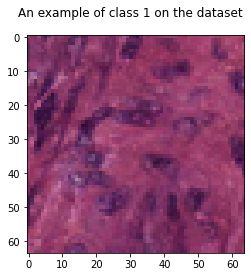

In [40]:
data_2 = data_hmn[(data_hmn["label"] == 3)]
data_2.drop(["label"],axis=1, inplace=True)
data_t2 = data_2
# data_0.head()
img_2 = data_t2.iloc[0].to_numpy()  #leon, new
img_2 = img_2.reshape(img_size,img_size,channel)
plt.imshow(img_2)
plt.suptitle("An example of class 1 on the dataset")
plt.show()

label
4    625
dtype: int64


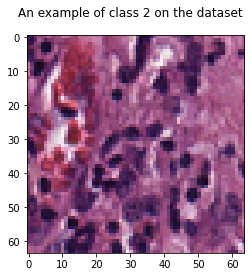

In [41]:
data_3 = data_hmn[(data_hmn["label"] == 4)]
print (data_3.value_counts(data_3["label"]))
data_3.drop(["label"],axis=1, inplace=True)
data_t3 = data_3
# data_0.head()
img_3 = data_t3.iloc[0].to_numpy()  #leon, new
img_3 = img_3.reshape(img_size,img_size,channel)
plt.imshow(img_3)
plt.suptitle("An example of class 2 on the dataset")
plt.show()

label
5    625
dtype: int64


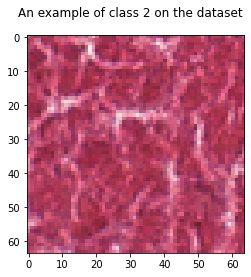

In [42]:
data_4 = data_hmn[(data_hmn["label"] == 5)]
print (data_4.value_counts(data_4["label"]))
data_4.drop(["label"],axis=1, inplace=True)
data_t4 = data_4
# data_0.head()
img_4 = data_t4.iloc[0].to_numpy()  #leon, new
img_4 = img_4.reshape(img_size,img_size,channel)
plt.imshow(img_4)
plt.suptitle("An example of class 2 on the dataset")
plt.show()

label
6    625
dtype: int64


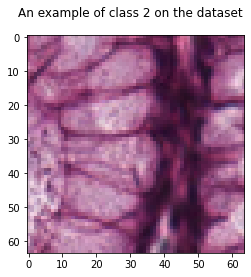

In [43]:
data_5 = data_hmn[(data_hmn["label"] == 6)]
print (data_5.value_counts(data_5["label"]))
data_5.drop(["label"],axis=1, inplace=True)
data_t5 = data_5
# data_0.head()
img_5 = data_t5.iloc[0].to_numpy()  #leon, new
img_5 = img_5.reshape(img_size,img_size,channel)
plt.imshow(img_5)
plt.suptitle("An example of class 2 on the dataset")
plt.show()

label
7    625
dtype: int64


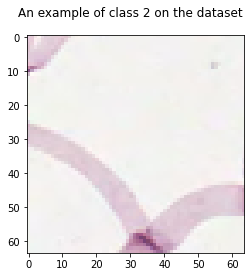

In [44]:
data_6 = data_hmn[(data_hmn["label"] == 7)]
print (data_6.value_counts(data_6["label"]))
data_6.drop(["label"],axis=1, inplace=True)
data_t6 = data_6
# data_0.head()
img_6 = data_t6.iloc[0].to_numpy()  #leon, new
img_6 = img_6.reshape(img_size,img_size,channel)
plt.imshow(img_6)
plt.suptitle("An example of class 2 on the dataset")
plt.show()

label
8    625
dtype: int64


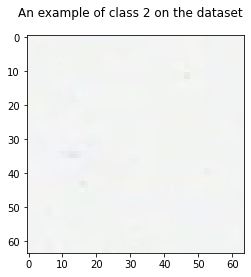

In [45]:
data_7 = data_hmn[(data_hmn["label"] == 8)]
print (data_7.value_counts(data_7["label"]))
data_7.drop(["label"],axis=1, inplace=True)
data_t7 = data_7
# data_0.head()
img_7 = data_t7.iloc[0].to_numpy()  #leon, new
img_7 = img_7.reshape(img_size,img_size,channel)
plt.imshow(img_7)
plt.suptitle("An example of class 2 on the dataset")
plt.show()

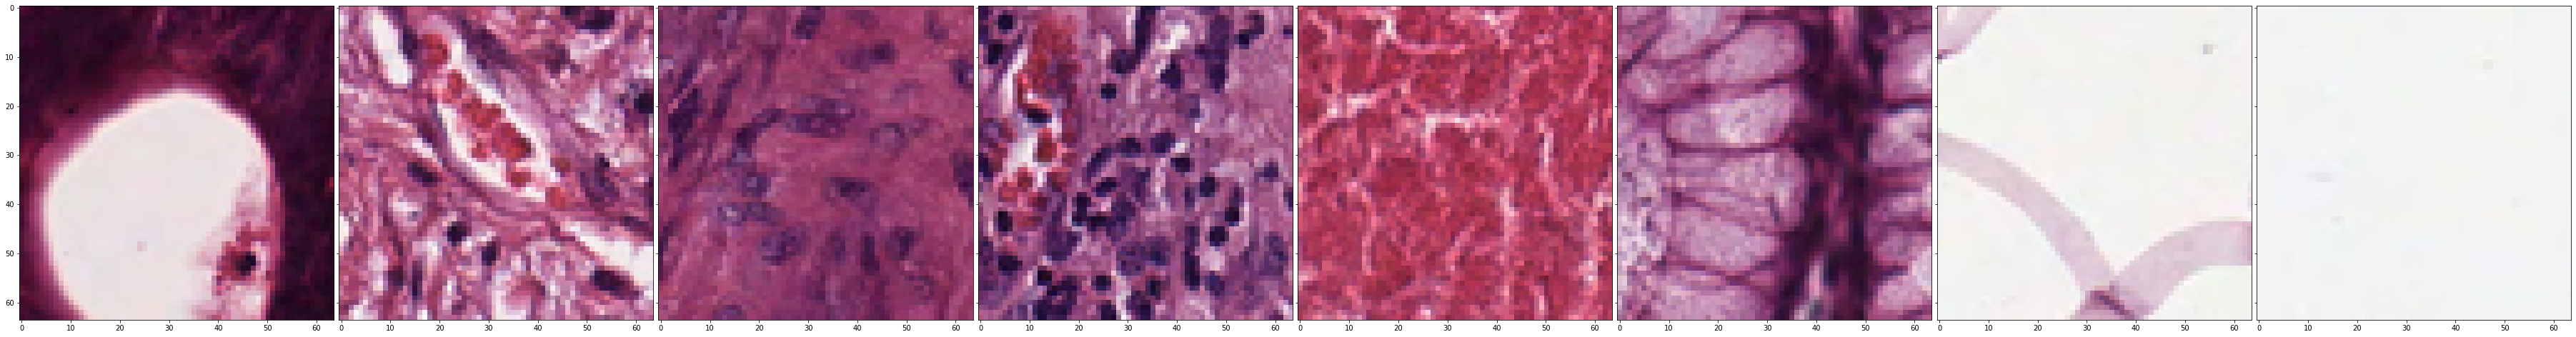

In [46]:
all_data = []
# for i in range(7):
  # all_data.append('img_%d' % i)
#   all_data.append(data_t%d.iloc[0].to_numpy() % i)
# aa = (data_t%d.iloc[0].to_numpy() % i

all_data.append(data_t0.iloc[0].to_numpy())
all_data.append(data_t1.iloc[0].to_numpy())
all_data.append(data_t2.iloc[0].to_numpy())
all_data.append(data_t3.iloc[0].to_numpy())
all_data.append(data_t4.iloc[0].to_numpy())
all_data.append(data_t5.iloc[0].to_numpy())
all_data.append(data_t6.iloc[0].to_numpy())
all_data.append(data_t7.iloc[0].to_numpy())
all_data2 = np.array(all_data)
all_data2 = np.reshape(all_data2, (all_data2.shape[0], img_size, img_size, channel))

# all_data = all_data.to_numpy
# all_data2 = np.array(all_data)
# all_data2 = all_data2.astype('float32')  
# all_data2 /= 255

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# import numpy as np

fig = plt.figure(figsize=(64., 64.))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(1, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, all_data2):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    # ax.set_title("test")

plt.show()

In [ ]:
Y = data["label"]
data.drop(["label"],axis=1, inplace=True)
X = data

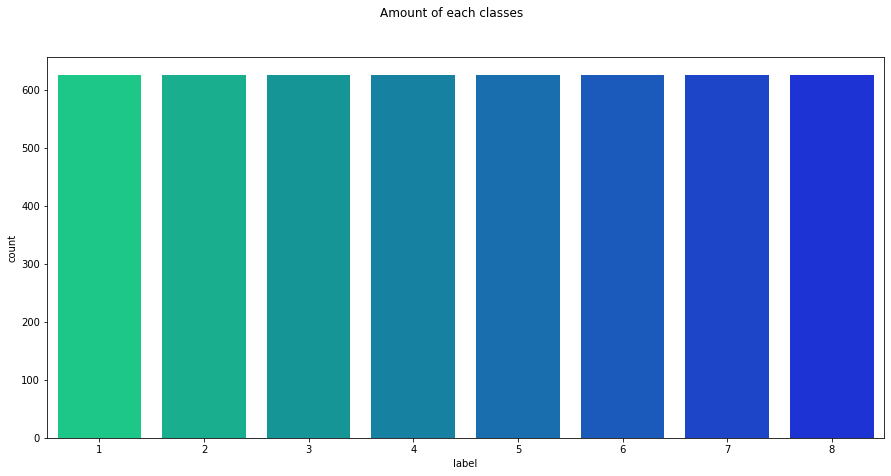

In [ ]:
# creating the countplot

plt.figure(figsize=(15,7))
g = sns.countplot(Y, palette="winter_r")
plt.suptitle("Amount of each classes")
plt.show()

In [ ]:
# it is very well balanced
Y.value_counts()  

4    625
5    625
1    625
8    625
6    625
2    625
3    625
7    625
Name: label, dtype: int64

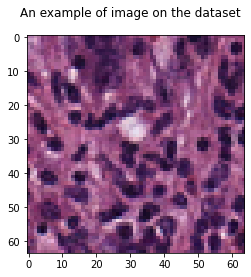

In [ ]:
#img = X.iloc[75].as_matrix()  #old
img = X.iloc[75].to_numpy()  #leon, new
img = img.reshape(64,64,3)
plt.imshow(img)
plt.suptitle("An example of image on the dataset")
plt.show()

In [ ]:
# Reshaping
img_size=64
IMG_SHAPE = (64, 64, 3)
# X = X.values.reshape(-1,28,28,1)       # shaping for the Keras
# Y = Y.values

In [ ]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
# normalize
#x_train = (x_train - 127.5) / 127.5
#x_train = x_train.astype("float32") / 255.0
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 3)
# x_train = x_train.reshape(x_train.shape[0], *IMG_SHAPE).astype("float32")
# x_train = np.reshape(x_train, (-1, img_size, img_size, 1))

#all_digits = all_digits.astype("float32") / 255.0
# x_train = np.reshape(x_train, (-1, img_size, img_size, 1))

#label-1 to match one hot encoder
y_train = y_train - 1  
y_test = y_test - 1
#
print(y_train.value_counts())
y_train = np.array(y_train) #convert to np.array
y_test = np.array(y_test) #convert to np.array

7    513
2    510
0    507
5    499
4    496
1    496
6    495
3    484
Name: label, dtype: int64


In [ ]:
print("x_train.shape: ",x_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)
# print(x_train[0:5])


x_train.shape:  (4000, 64, 64, 3)
x_test.shape:  (1000, 64, 64, 3)
y_train.shape:  (4000,)
y_test.shape:  (1000,)


In [ ]:
#***evaluate on origin data and augmented data together
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time
import numpy as np
from random import *
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                  

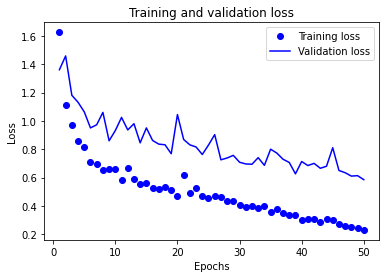

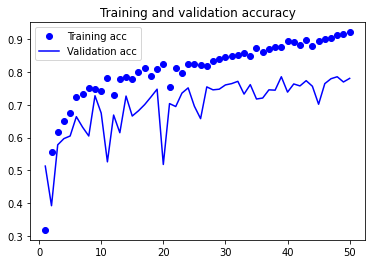

Test loss: 0.5847038626670837
Test accuracy: 0.781000018119812
32/32 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       118
           1       0.62      0.70      0.66       129
           2       0.65      0.69      0.67       115
           3       0.94      0.82      0.87       141
           4       0.73      0.51      0.60       129
           5       0.75      0.90      0.82       126
           6       0.99      0.78      0.87       130
           7       0.86      0.99      0.92       112

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000



In [ ]:
# Define parameters
batch_size = 128
num_classes = 8
epochs = 50
img_rows, img_cols = 64, 64	# Input image dimensions

labels = [4]			# Reduce the 'T-shirt/Top' class

# x_train = x_train.values
# x_test = x_test.values

'''Preprocess'''

if K.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
	x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
	input_shape = (3, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
	input_shape = (img_rows, img_cols, 3)

'''
# Unbalance data
print ("Original colorectal dataset: ",x_train.shape, y_train.shape)

for label in labels:
	# Get number of samples of '6' and their indices
	indices = np.where(y_train == label)[0]
	n = len(indices)
	print ("Original number of images with ",label, ": ",n)

	# Delete a random 70% of n
	delete_index = sample(list(indices), int(0.7*n))
	x_train = np.delete(x_train, delete_index, 0)
	y_train = np.delete(y_train, delete_index, 0)

	print ("New number of images with ",label, ": ",len(np.where(y_train == label)[0]))
	print ("Now adding GAN data ...")

	# Load synthetic data
	x_gen = np.load('images/x_train_class_%d.npy' % label)

	# Normalize data
	x_gen = np.abs(x_gen)
	x_gen *= 255
	x_gen = x_gen.astype(np.uint8)
	x_gen = np.reshape(x_gen, (x_gen.shape[0], 28, 28, 1))
	
	y_gen = np.load('images/y_train_class_%d.npy' % label)
	y_gen = y_gen.astype(int)

	# Combine both datasets and shuffle
	x_train = np.concatenate((x_train, x_gen))
	y_train = np.concatenate((y_train, y_gen))
	x_train, y_train = shuffle(x_train, y_train, random_state=0)

print ("New F-MNIST: ",x_train.shape, y_train.shape)
'''

# Normalize data
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


''' Train Model '''

# Define model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))
###
tf.random.set_seed(42) #leon

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                verbose=1, save_best_only=True)
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))

# model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size = 3))
# model.add(Flatten())
# model.add(Dense(128,activation = 'relu'))

model.add(GlobalMaxPooling2D())
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()
####

# Fit model
start = time.time()
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model
end = time.time()
print ("Time: ", (end-start))

#display loss, accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
plt.plot(epochs, acc,'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
###

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
#y_pred = model.predict_classes(x_test)  #old version
y_pred = np.argmax(model.predict(x_test), axis=-1)  #leon, new version
print(classification_report(Y_test, y_pred))

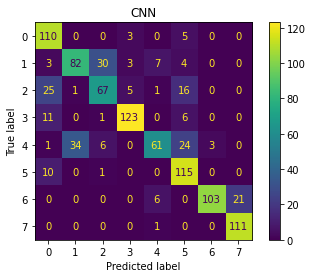

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names_num = ['0', '1', '2', '3', '4', '5', '6', '7']
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_num)
disp.plot()
_ = disp.ax_.set_title("CNN")
plt.show()